# Plot multiple sensors

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# *** Waterloo Temps ***

# Great Marsh weather station
wx_file = 'data/dst/wx_data.parquet'
wx_df = pd.read_parquet(wx_file)

# Waterloo mayfly
mayfly_file1 = 'data/dst/mayfly_GMI_CTD8.parquet'
mayfly_df1 = pd.read_parquet(mayfly_file1)

# Colocated Waterloo mayfly
mayfly_file2 = 'data/dst/mayfly_GMI_CTD6.parquet'
mayfly_df2 = pd.read_parquet(mayfly_file2)

# HOBO air temperature station
hobo_file1 = 'data/dst/21852517 2024-07-22 10_25_20 UTC (Data UTC).parquet'
# hobo_file1 = 'data/dst/FM-Temp-21852518-LB 2024-07-22 10_18_03 UTC (Data UTC).parquet'
hobo_df1 = pd.read_parquet(hobo_file1)

# HOBO water temperature at bridge
hobo_file2 = 'data/dst/FM-Temp-21852521-FD 2024-07-22 10_22_54 UTC (Data UTC).parquet'
hobo_df2 = pd.read_parquet(hobo_file2)

In [8]:
# get the start and stop Timestamp
start = hobo_df1.index.min()
stop = hobo_df1.index.max()
print(f'start: {start}')
print(f'stop: {stop}')

start: 2024-07-12 19:20:00+00:00
stop: 2024-07-19 12:40:00+00:00


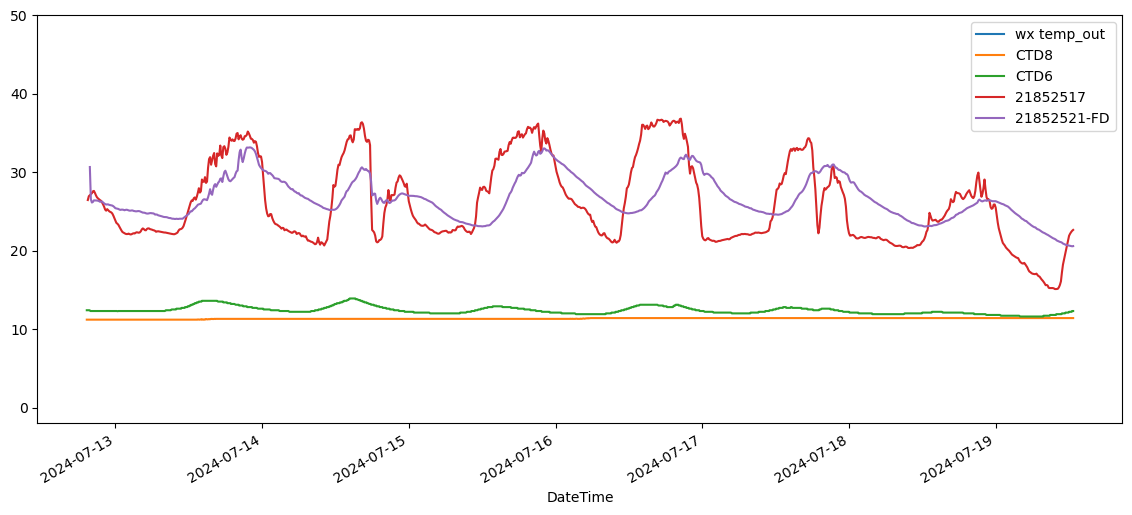

In [9]:
fig, ax0 = plt.subplots(1,1)
fig.set_size_inches(14,6)

wx_df.loc[start:stop]['Temp_Out'].plot(ax=ax0, kind='line', label='wx temp_out')

mayfly_df1[start:stop]['Meter_Hydros21_Temp'].plot(ax=ax0, kind='line', linestyle=None, label='CTD8')
mayfly_df2[start:stop]['Meter_Hydros21_Temp'].plot(ax=ax0, kind='line', linestyle=None, label='CTD6')

hobo_df1.loc[start:stop]['Temp'].plot(ax=ax0, kind='line', label='21852517')
hobo_df2[start:stop]['Temp'].plot(ax=ax0, kind='line', label='21852521-FD')

ax0.set_ylim([-2,50])

ax0.legend()

plt.show()